In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df['color'] = df['color'].astype('category')
df['color'] = df['color'].cat.codes

df['cut'] = df['cut'].astype('category')
df['cut'] = df['cut'].cat.codes

df['clarity'] = df['clarity'].astype('category')
df['clarity'] = df['clarity'].cat.codes

In [5]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,6,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.corr()['carat']

carat      1.000000
cut        0.134967
color      0.291437
clarity    0.352841
depth      0.028224
table      0.181618
price      0.921591
x          0.975094
y          0.951722
z          0.953387
Name: carat, dtype: float64

In [7]:
from copy import deepcopy

carat = df['carat']
df = df.drop(['cut', 'color', 'clarity', 'depth', 'table', 'price'], axis=1)
df['carat'] = carat
df

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


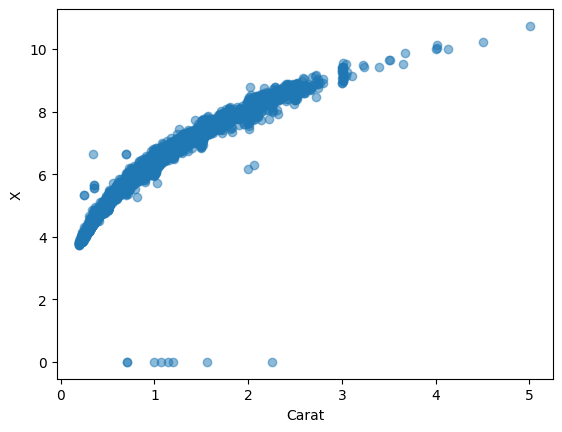

In [8]:
plt.scatter(df['carat'], df['x'], alpha=0.5)
plt.xlabel('Carat')
plt.ylabel('X')
plt.show()

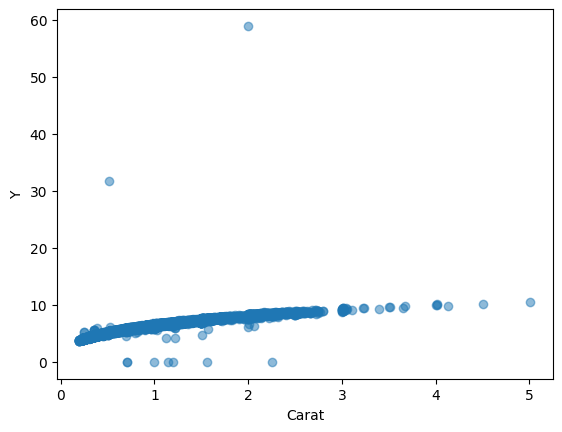

In [9]:
plt.scatter(df['carat'], df['y'], alpha=0.5)
plt.xlabel('Carat')
plt.ylabel('Y')
plt.show()

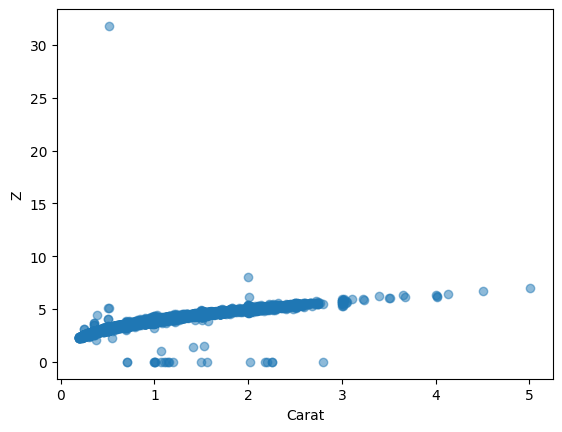

In [10]:
plt.scatter(df['carat'], df['z'], alpha=0.5)
plt.xlabel('Carat')
plt.ylabel('Z')
plt.show()

In [11]:
df_np = df.to_numpy()
df_np.shape

(53940, 4)

In [12]:
X_train, y_train = df_np[:, :3], df_np[:, -1]
X_train.shape, y_train.shape

((53940, 3), (53940,))

In [13]:
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_train)
y_pred

array([2.48526028, 2.44397739, 2.53739961, ..., 3.48258942, 3.77019328,
       3.58385669])

In [14]:
reg_model.score(X_train, y_train)

0.9439673741572367

In [15]:
mse = mean_squared_error(y_pred, y_train)
print('The mean squared error is:', mse)

mae = mean_absolute_error(y_pred, y_train)
print('The mean absolute error is:', mae)

r2 = r2_score(y_pred, y_train)
print('The R-squared is:', r2)

The mean squared error is: 0.027904338997532627
The mean absolute error is: 0.06177878282743553
The R-squared is: 0.9406413533171233


In [16]:
pred_df = pd.DataFrame({'Carat': df['carat'],
                       'X': df['x'],
                       'Y': df['y'],
                       'Z': df['z'],
                       'carat Pred': y_pred})
pred_df

,Carat,X,Y,Z,carat Pred
0,0.23,3.95,3.98,2.43,2.485260
1,0.21,3.89,3.84,2.31,2.443977
2,0.23,4.05,4.07,2.31,2.537400
3,0.29,4.20,4.23,2.63,2.629417
4,0.31,4.34,4.35,2.75,2.706019
...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,3.533469
53936,0.72,5.69,5.75,3.61,3.505243
53937,0.70,5.66,5.68,3.56,3.482589
53938,0.86,6.15,6.12,3.74,3.770193


In [17]:
def get_prediction(model, X):
    (n, p_minus_one) = X.shape
    p = p_minus_one + 1

    new_X = np.ones(shape=(n, p))
    new_X [:, 1:] = X

    return np.dot(new_X, model)

In [18]:
test_model = np.array([1, 1/5, 1/5, 1/5])
get_prediction(test_model, X_train)

array([2.632, 2.588, 2.67 , ..., 3.408, 3.626, 3.49 ])

In [19]:
pred_df['Test Prediction'] = get_prediction(test_model, X_train)
pred_df

,Carat,X,Y,Z,carat Pred,Test Prediction
0,0.23,3.95,3.98,2.43,2.485260,2.632
1,0.21,3.89,3.84,2.31,2.443977,2.588
2,0.23,4.05,4.07,2.31,2.537400,2.670
3,0.29,4.20,4.23,2.63,2.629417,2.744
4,0.31,4.34,4.35,2.75,2.706019,2.800
...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,3.533469,3.446
53936,0.72,5.69,5.75,3.61,3.505243,3.432
53937,0.70,5.66,5.68,3.56,3.482589,3.408
53938,0.86,6.15,6.12,3.74,3.770193,3.626


In [20]:
mse = mean_squared_error(pred_df['Test Prediction'], y_train)
print('The mean squared error is:', mse)

mae = mean_absolute_error(pred_df['Test Prediction'], y_train)
print('The mean absolute error is:', mae)

r2 = r2_score(pred_df['Test Prediction'], y_train)
print('The R-squared is:', r2)

The mean squared error is: 0.0576198727474972
The mean absolute error is: 0.1561905079718205
The R-squared is: 0.8040783245303331


In [21]:
from numpy.linalg import inv

def get_best_model(X, y):
    (n, p_minus_one) = X.shape
    p = p_minus_one + 1

    new_X = np.ones(shape=(n, p))
    new_X [:, 1:] = X

    return np.dot(np.dot(inv(np.dot(new_X.T, new_X)),new_X.T), y)

In [22]:
best_model = get_best_model(X_train, y_train)
pred_df['Best Prediction'] = get_prediction(best_model, X_train)
pred_df

,Carat,X,Y,Z,carat Pred,Test Prediction,Best Prediction
0,0.23,3.95,3.98,2.43,2.485260,2.632,2.485260
1,0.21,3.89,3.84,2.31,2.443977,2.588,2.443977
2,0.23,4.05,4.07,2.31,2.537400,2.670,2.537400
3,0.29,4.20,4.23,2.63,2.629417,2.744,2.629417
4,0.31,4.34,4.35,2.75,2.706019,2.800,2.706019
...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,3.533469,3.446,3.533469
53936,0.72,5.69,5.75,3.61,3.505243,3.432,3.505243
53937,0.70,5.66,5.68,3.56,3.482589,3.408,3.482589
53938,0.86,6.15,6.12,3.74,3.770193,3.626,3.770193


In [23]:
mse = mean_squared_error(pred_df['Best Prediction'], y_train)
print('The mean squared error is:', mse)

mae = mean_absolute_error(pred_df['Best Prediction'], y_train)
print('The mean absolute error is:', mae)

r2 = r2_score(pred_df['Best Prediction'], y_train)
print('The R-squared is:', r2)

The mean squared error is: 0.027904338997532627
The mean absolute error is: 0.061778782827432585
The R-squared is: 0.9406413533171204
